Dataset shape: (100, 2)

First few rows:
   tvAdSpend  sales
0        0.0    3.1
1        1.0    6.3
2        2.0   10.5
3        3.0    9.6
4        4.0   16.0


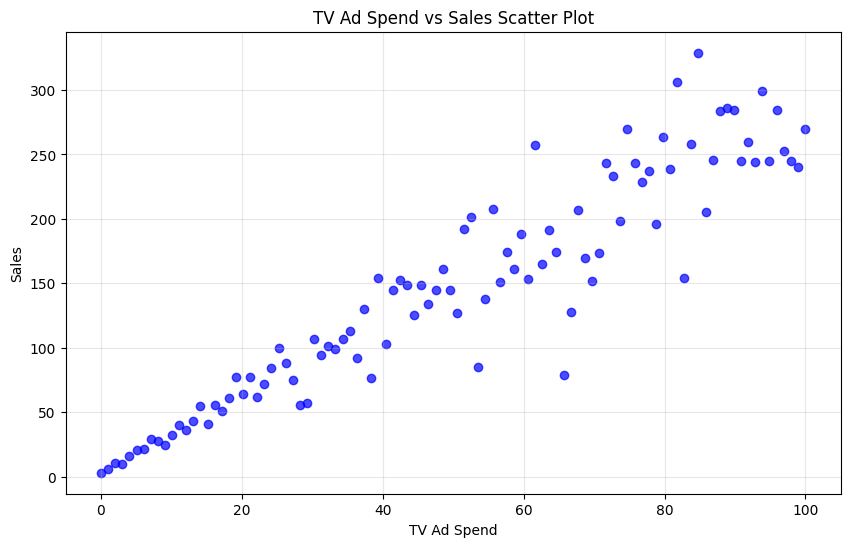

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/sales_tv.csv', header=None, names=['tvAdSpend', 'sales'])

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['tvAdSpend'], df['sales'], alpha=0.7, color='blue')
plt.xlabel('TV Ad Spend')
plt.ylabel('Sales')
plt.title('TV Ad Spend vs Sales Scatter Plot')
plt.grid(True, alpha=0.3)
plt.show()


Linear Regression Model Results:
Slope (coefficient): 2.7640
Intercept: 8.2456
R-squared: 0.8793
Mean Squared Error: 891.3034


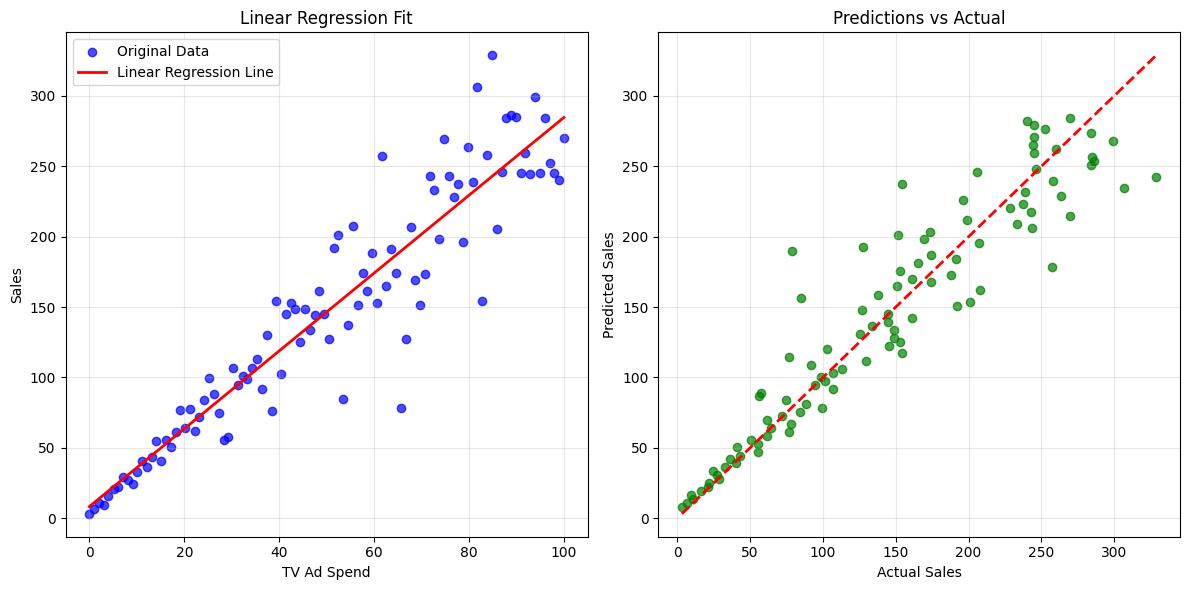


Example predictions:
For TV Ad Spend = 5.0, predicted Sales = 22.0654
For TV Ad Spend = 10.0, predicted Sales = 35.8853
For TV Ad Spend = 15.0, predicted Sales = 49.7051


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data for training
X = df[['tvAdSpend']].values  # Features (tvAdSpend values)
y = df['sales'].values        # Target (sales values)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Display model parameters
print("Linear Regression Model Results:")
print(f"Slope (coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r2_score(y, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.4f}")

# Plot the original data and the regression line
plt.figure(figsize=(12, 6))

# Subplot 1: Original data with regression line
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.7, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('TV Ad Spend')
plt.ylabel('Sales')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Predictions vs Actual values
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predictions vs Actual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Function to predict sales for any given tvAdSpend
def predict_sales(tv_ad_spend):
    """Predict sales value for a given TV ad spend"""
    prediction = model.predict([[tv_ad_spend]])
    return prediction[0]

# Example predictions
print(f"\nExample predictions:")
print(f"For TV Ad Spend = 5.0, predicted Sales = {predict_sales(5.0):.4f}")
print(f"For TV Ad Spend = 10.0, predicted Sales = {predict_sales(10.0):.4f}")
print(f"For TV Ad Spend = 15.0, predicted Sales = {predict_sales(15.0):.4f}")


In [ ]:
# Analysis function for comparing predictions with nearby data points
def analyze_prediction(tv_ad_spend, tolerance=1.0):
    """
    Analyze a prediction for a given TV ad spend value and show nearby data points
    """
    # Get the model's prediction using the correct function
    predicted_sales = predict_sales(tv_ad_spend)
    
    # Find nearby data points in the dataset
    nearby_data = df[abs(df['tvAdSpend'] - tv_ad_spend) <= tolerance].copy()
    nearby_data = nearby_data.sort_values('tvAdSpend')
    
    # Create comparison table
    print(f"Analysis for TV Ad Spend = {tv_ad_spend}")
    print("=" * 50)
    print()
    
    if len(nearby_data) > 0:
        print(f"Nearby data points (within ±{tolerance} of TV Ad Spend={tv_ad_spend}):")
        print("-" * 50)
        
        # Create a formatted table
        comparison_data = []
        
        # Add the user's input value first
        comparison_data.append({
            'TV Ad Spend': tv_ad_spend,
            'Actual Sales': 'N/A',
            'Predicted Value': f"{predicted_sales:.4f}"
        })
        
        # Add nearby data points
        for _, row in nearby_data.iterrows():
            actual_x, actual_y = row['tvAdSpend'], row['sales']
            predicted_y = predict_sales(actual_x)
            comparison_data.append({
                'TV Ad Spend': actual_x,
                'Actual Sales': actual_y,
                'Predicted Value': f"{predicted_y:.4f}"
            })
        
        # Display as a nice table
        comparison_df = pd.DataFrame(comparison_data)
        # Sort by TV Ad Spend
        comparison_df_sorted = comparison_df.sort_values("TV Ad Spend")
        print(comparison_df_sorted.to_string(index=False))
        
        # Calculate average nearby y value for comparison
        avg_nearby_y = nearby_data['sales'].mean()
        print(f"\nAverage sales value of nearby points: {avg_nearby_y:.4f}")
        print(f"Difference from model prediction: {abs(avg_nearby_y - predicted_sales):.4f}")
        
    else:
        print(f"No data points found within ±{tolerance} of TV Ad Spend={tv_ad_spend}")
        print("Try increasing the tolerance or check if the TV Ad Spend value is within the dataset range.")


In [18]:
# Interactive input for user to test their own x values
print("Interactive Prediction Tool")
print("=" * 40)
print("Enter an x value to see the model's prediction and nearby data points")
print("Type 'quit' to exit")
print()

try:
    # Get user input
    user_input = input("Enter x value (or 'quit' to exit): ").strip()
    
    if user_input.lower() == 'quit':
        print("Goodbye!")
    else:
        x_value = float(user_input)
        
        # Use default tolerance of 1.0
        tolerance = 1.0
        
        print()
        analyze_prediction(x_value, tolerance)
        print()
    
except ValueError:
    print("Please enter a valid number for x value.")
    print()
except KeyboardInterrupt:
    print("\nGoodbye!")
#

Interactive Prediction Tool
Enter an x value to see the model's prediction and nearby data points
Type 'quit' to exit


Analysis for TV Ad Spend = 10.0
Model Prediction: Sales = 35.8853

Nearby data points (within ±1.0 of TV Ad Spend=10.0):
--------------------------------------------------
 TV Ad Spend  Actual Sales Prediction Error
         9.1          24.5          11.3853
        10.1          32.6           3.2853

Average sales value of nearby points: 28.5500
Difference from model prediction: 7.3353

